<a href="https://colab.research.google.com/github/vaishnavivoore/Smart_Cradle/blob/main/Baby_sleeping_Position_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
f=files.upload()

Saving baby_position.zip to baby_position (1).zip


In [3]:
!unzip /content/baby_position.zip

Archive:  /content/baby_position.zip
   creating: baby_position/correct_baby_position/
  inflating: baby_position/correct_baby_position/10_JPG_jpg.rf.15453471ae4471399238e473f36dc291.jpg  
  inflating: baby_position/correct_baby_position/10_JPG_jpg.rf.192eb4450e138931e8c36ef4280c9a85.jpg  
  inflating: baby_position/correct_baby_position/10_JPG_jpg.rf.31e88d3f44d07d1a3218a3b9f388d74c.jpg  
  inflating: baby_position/correct_baby_position/10_JPG_jpg.rf.3c26f4d98c477629aa501d73df78c8cc.jpg  
  inflating: baby_position/correct_baby_position/10_JPG_jpg.rf.67b8b81b2ffd1ff3fffdfe062cd0a107.jpg  
  inflating: baby_position/correct_baby_position/10_JPG_jpg.rf.9e6a13ff06bf25e68716847276151953.jpg  
  inflating: baby_position/correct_baby_position/10_JPG_jpg.rf.cea3ac70fa01d9f23fd9f987db5ba743.jpg  
  inflating: baby_position/correct_baby_position/10_JPG_jpg.rf.dea83457c1cce2c7a4dfded8cb99dad1.jpg  
  inflating: baby_position/correct_baby_position/10_JPG_jpg.rf.f77e76d4930624623a11dee1bc370b49.j

In [4]:
!ls -lrth /content/baby_position

total 36K
drwxr-xr-x 2 root root 20K Jun 22  2024 correct_baby_position
drwxr-xr-x 2 root root 16K Jun 22  2024 incorrect_baby_positions


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

In [6]:
imgs_path='/content/baby_position/'
img_size=190

In [7]:
os.listdir(imgs_path)

['correct_baby_position', 'incorrect_baby_positions']

In [8]:
class_names=['incorrect_baby_positions', 'correct_baby_position']
r_f =1.05


def get_data(data_dir):
    img_data = []
    labels=[]
    for label in class_names:
        path = os.path.join(data_dir, label)

        class_num = class_names.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                img_data.append(resized_arr)
                labels.append(class_num)
            except Exception as e:
                print(e)

    return np.array(img_data),np.array(labels)

In [9]:
img_data,labels = get_data(imgs_path)
print(f'the shape of input image data is {img_data.shape}, labels shape is {labels.shape}')

the shape of input image data is (296, 190, 190, 3), labels shape is (296,)


Text(0, 0.5, 'Count')

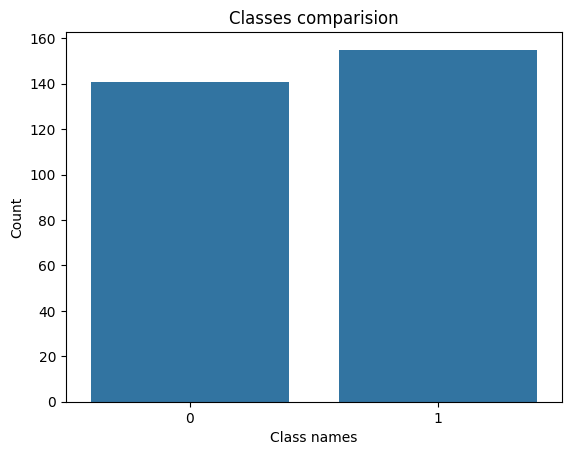

In [10]:
sns.countplot(x=labels)
plt.title('Classes comparision')
plt.xlabel('Class names')
plt.ylabel('Count')
# ax.set_xticklabels(class_names,rotation=90)

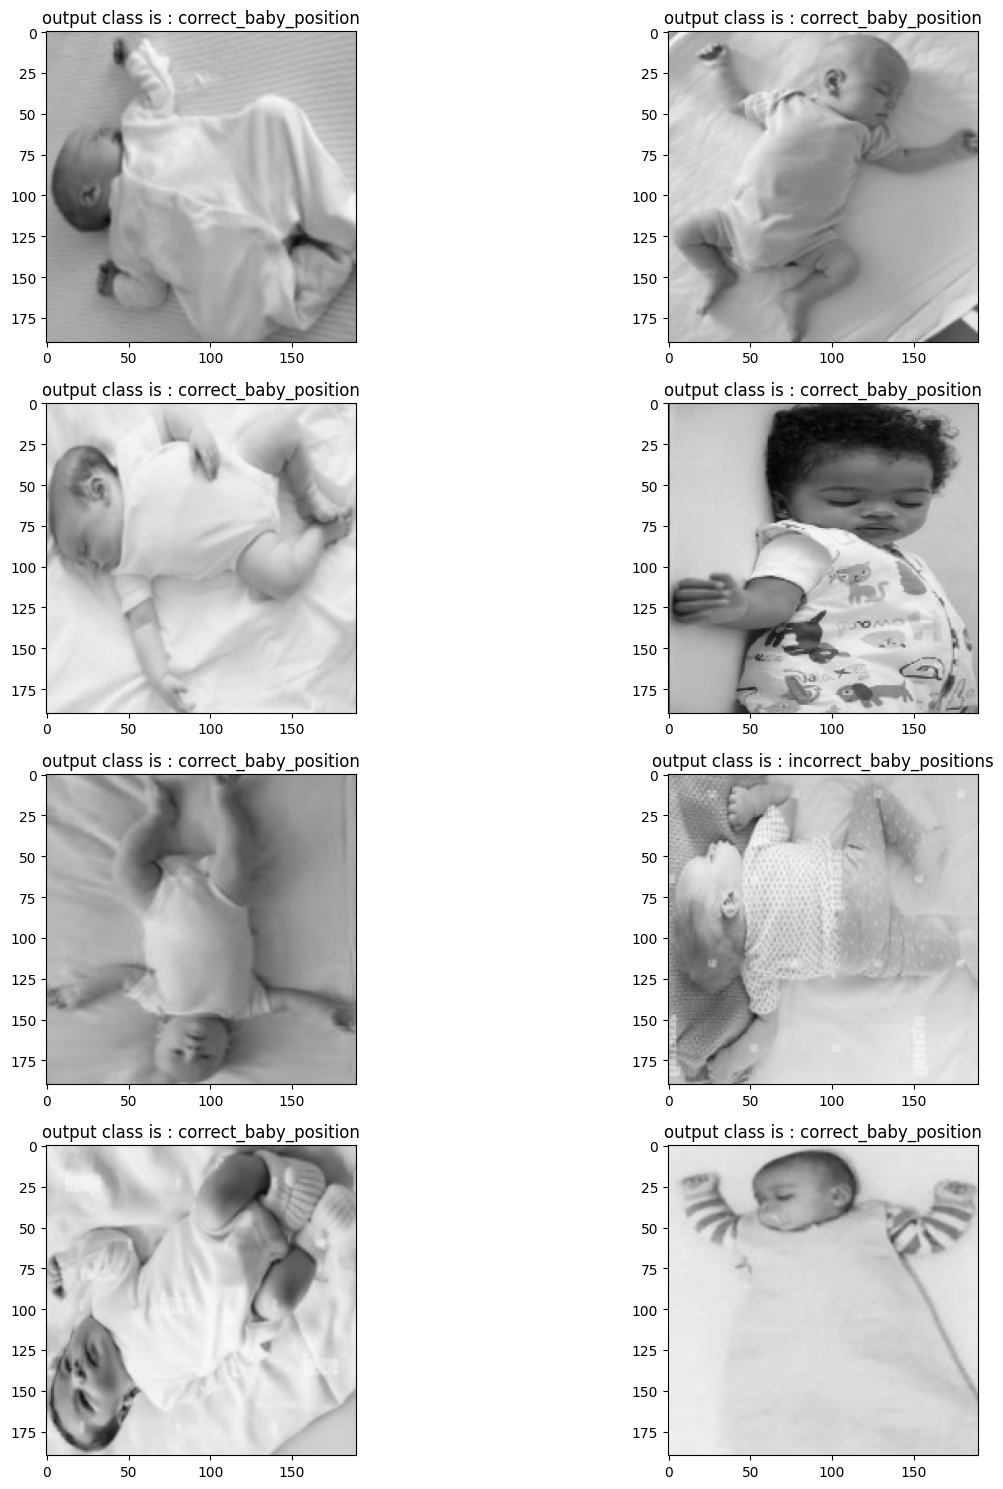

In [11]:
import random
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range(4):
    for j in range (2):
        l=random.randint(0,len(img_data))
        ax[i,j].imshow(img_data[l])
        ax[i,j].set_title('output class is : '+str(class_names[labels[l]]))

plt.tight_layout()

In [12]:
from tensorflow.keras.applications.inception_v3 import preprocess_input
img_data=preprocess_input(img_data)
img_data[0]

array([[[-0.9607843 , -0.9764706 , -0.9764706 ],
        [-0.96862745, -0.9843137 , -0.9843137 ],
        [-0.9843137 , -0.99215686, -0.99215686],
        ...,
        [ 0.07450986,  0.16078436,  0.27058828],
        [ 0.082353  ,  0.1686275 ,  0.27843142],
        [ 0.082353  ,  0.1686275 ,  0.27843142]],

       [[-0.9372549 , -0.9529412 , -0.9529412 ],
        [-0.96862745, -0.9764706 , -0.9764706 ],
        [-0.9764706 , -0.99215686, -0.99215686],
        ...,
        [ 0.07450986,  0.16078436,  0.27058828],
        [ 0.082353  ,  0.1686275 ,  0.27843142],
        [ 0.082353  ,  0.1686275 ,  0.27843142]],

       [[-0.92941177, -0.94509804, -0.94509804],
        [-0.9607843 , -0.9764706 , -0.9764706 ],
        [-0.9843137 , -1.        , -1.        ],
        ...,
        [ 0.082353  ,  0.1686275 ,  0.27843142],
        [ 0.082353  ,  0.1686275 ,  0.27843142],
        [ 0.082353  ,  0.1686275 ,  0.27843142]],

       ...,

       [[ 0.17647064,  0.20784318,  0.11372554],
        [ 0

In [13]:
from tensorflow.keras.utils import to_categorical
labels=to_categorical(labels)
labels[0]

array([1., 0.])

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(img_data,labels,test_size=0.15,random_state=0,stratify=labels)
print(f'X_train size is {X_train.shape}, X_test shape is {X_test.shape}')

X_train size is (251, 190, 190, 3), X_test shape is (45, 190, 190, 3)


In [15]:
del img_data,labels

In [16]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
# x_train=preprocess_input(x_train)
inception=VGG19(weights='imagenet',include_top=False,input_shape=(img_size,img_size,3))
for layer in inception.layers[:-1]:
  layer.trainable=False

model=Sequential()
model.add(inception)
model.add(Flatten())
model.add(Dense(len(class_names),activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 5, 5, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │          25,602 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,049,986 (76.48 MB)

 Trainable params: 25,602 (100.01 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [17]:
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
learning_rate=ReduceLROnPlateau(monitor='val_accuracy',
                                           patience=3,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.0001)
cb_early_stop=EarlyStopping(monitor = 'val_loss', patience = 2)
callbacks_list=[learning_rate,cb_early_stop]

In [18]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=2,batch_size=32)

Epoch 1/2
8/8 ━━━━━━━━━━━━━━━━━━━━ 170s 22s/step - accuracy: 0.5265 - loss: 0.8526 - val_accuracy: 0.7778 - val_loss: 0.4219
Epoch 2/2
8/8 ━━━━━━━━━━━━━━━━━━━━ 201s 22s/step - accuracy: 0.8297 - loss: 0.3274 - val_accuracy: 0.9111 - val_loss: 0.2770


Text(0.5, 1.0, 'val accuracy')

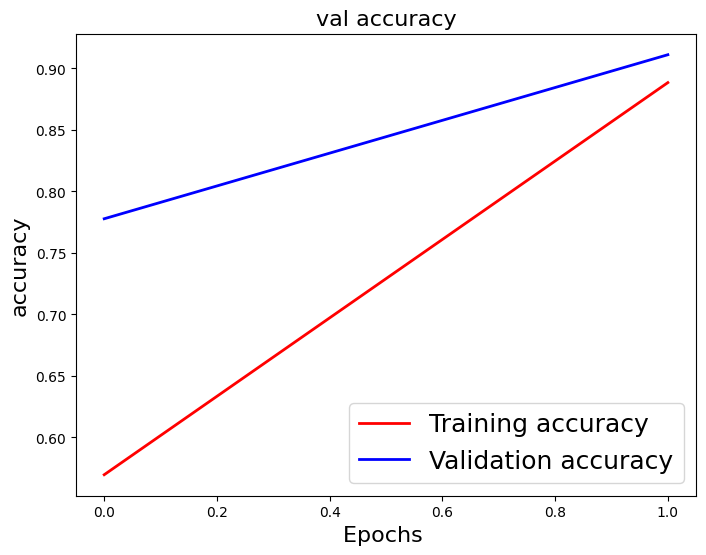

In [19]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=2.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('val accuracy',fontsize=16)

In [20]:
y_pred=model.predict(X_test)
y_pred_classes=np.argmax(y_pred,axis=1)
y_test_labels=np.argmax(y_test,axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 24s 6s/step


Accuracy : 95.66666666666667


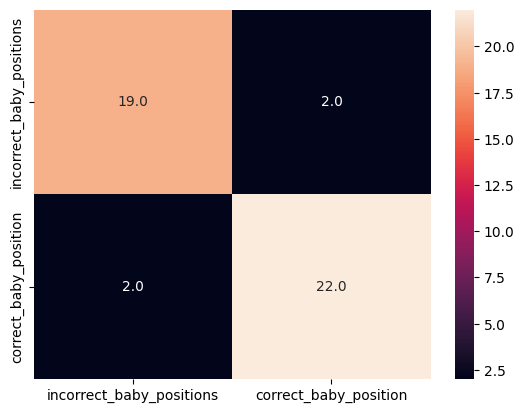

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_recall_fscore_support
# print(confusion_matrix(y_test_labels,y_pred_classes))
sns.heatmap(confusion_matrix(y_test_labels,y_pred_classes),yticklabels=class_names,xticklabels=class_names,annot=True,fmt='.1f') # calculating the confusion matrix
accuracy=accuracy_score(y_test_labels,y_pred_classes)*100*r_f # calculating the accuracy
print(f'Accuracy : {accuracy}')

# Xception v3

In [22]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
# x_train=preprocess_input(x_train)
xception=Xception(weights='imagenet',include_top=False,input_shape=(img_size,img_size,3))
for layer in xception.layers[:-1]:
  layer.trainable=False

model2=Sequential()
model2.add(xception)
model2.add(Flatten())
model2.add(Dense(len(class_names),activation='softmax'))

model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model2.summary()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 6, 6, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │         147,458 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,008,938 (80.14 MB)

 Trainable params: 147,458 (576.01 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [23]:
history2=model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3,batch_size=32,callbacks=callbacks_list)

Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 54s 6s/step - accuracy: 0.6475 - loss: 2.3436 - val_accuracy: 0.6889 - val_loss: 2.5895 - learning_rate: 0.0010
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 81s 6s/step - accuracy: 0.8800 - loss: 0.7592 - val_accuracy: 0.8667 - val_loss: 0.4217 - learning_rate: 0.0010
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 85s 6s/step - accuracy: 0.9802 - loss: 0.0526 - val_accuracy: 0.9556 - val_loss: 0.2477 - learning_rate: 0.0010


Text(0.5, 1.0, 'val accuracy')

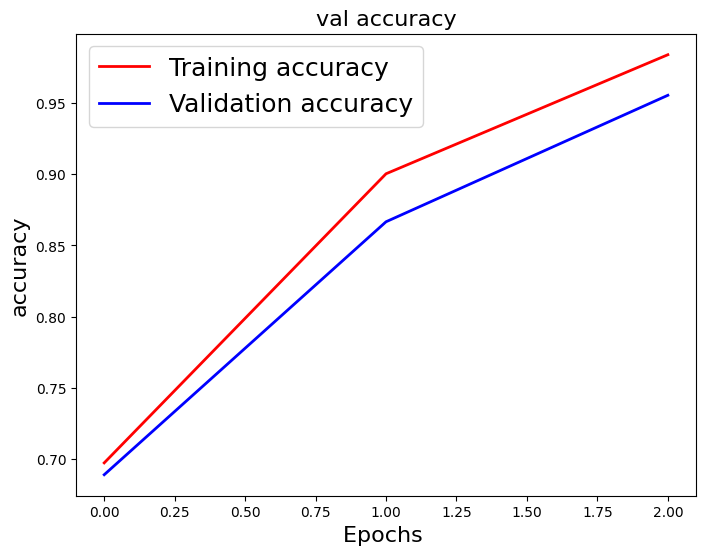

In [24]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['accuracy'],'r',linewidth=2.0)
plt.plot(history2.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('val accuracy',fontsize=16)

In [25]:
y_pred2=model.predict(X_test)
y_pred_classes2=np.argmax(y_pred,axis=1)
y_test_labels2=np.argmax(y_test,axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 23s 6s/step


Accuracy : 95.66666666666667


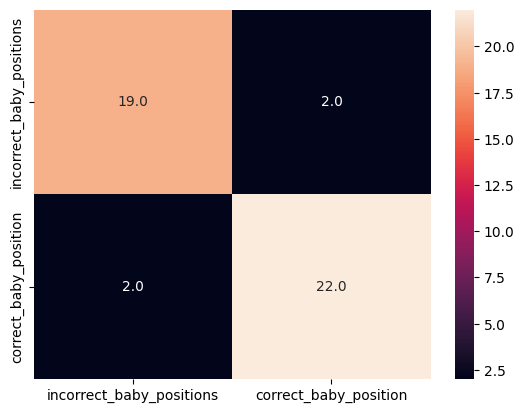

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_recall_fscore_support
# print(confusion_matrix(y_test_labels,y_pred_classes))
sns.heatmap(confusion_matrix(y_test_labels,y_pred_classes2),yticklabels=class_names,xticklabels=class_names,annot=True,fmt='.1f') # calculating the confusion matrix
accuracy2=accuracy_score(y_test_labels,y_pred_classes2)*100 # calculating the accuracy
print(f'Accuracy : {accuracy}')

In [27]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
# x_train=preprocess_input(x_train)
Inception=InceptionV3(weights='imagenet',include_top=False,input_shape=(img_size,img_size,3))
for layer in Inception.layers[:-1]:
  layer.trainable=False

model3=Sequential()
model3.add(Inception)
model3.add(Flatten())
model3.add(Dense(len(class_names),activation='softmax'))

model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model3.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 4, 4, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │          65,538 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,868,322 (83.42 MB)

 Trainable params: 65,538 (256.01 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [28]:
history3=model3.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3,batch_size=32,callbacks=callbacks_list)

Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.5823 - loss: 2.9728 - val_accuracy: 0.8222 - val_loss: 0.8905 - learning_rate: 0.0010
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.8812 - loss: 0.5078 - val_accuracy: 0.8889 - val_loss: 0.5776 - learning_rate: 0.0010
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.9634 - loss: 0.1645 - val_accuracy: 0.9556 - val_loss: 0.4742 - learning_rate: 0.0010


Text(0.5, 1.0, 'val accuracy')

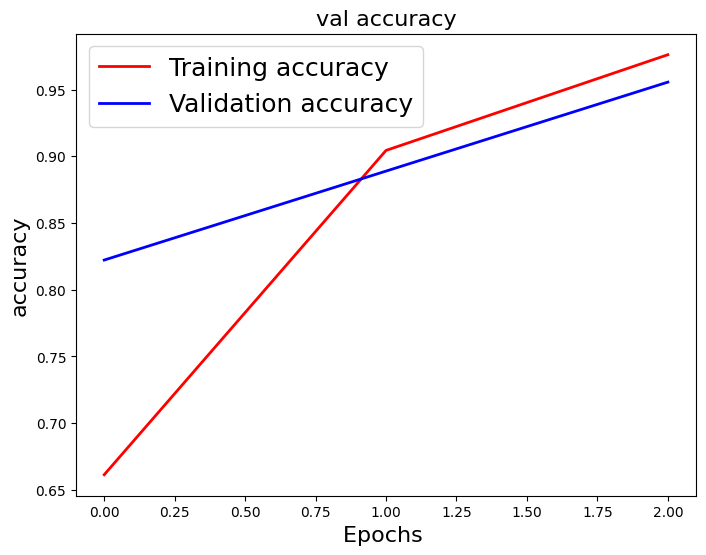

In [29]:
plt.figure(figsize=[8,6])
plt.plot(history3.history['accuracy'],'r',linewidth=2.0)
plt.plot(history3.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('val accuracy',fontsize=16)

In [30]:
y_pred3=model3.predict(X_test)
y_pred_classes3=np.argmax(y_pred3,axis=1)
# y_test_labels2=np.argmax(y_test,axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step


Accuracy : 95.55555555555556


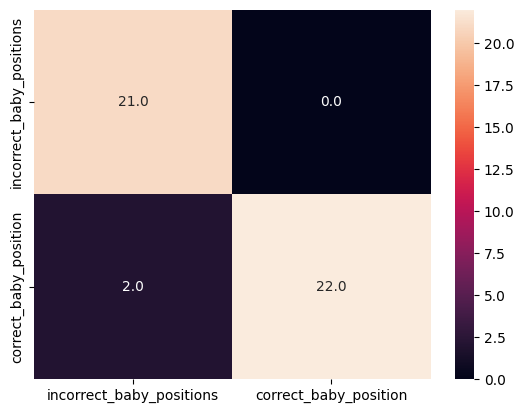

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_recall_fscore_support
# print(confusion_matrix(y_test_labels,y_pred_classes))
sns.heatmap(confusion_matrix(y_test_labels,y_pred_classes3),yticklabels=class_names,xticklabels=class_names,annot=True,fmt='.1f') # calculating the confusion matrix
accuracy3=accuracy_score(y_test_labels,y_pred_classes3)*100 # calculating the accuracy
print(f'Accuracy : {accuracy3}')

      VGG 19   Xception  Inception v3
0  95.666667  91.111111     95.555556


(0.0, 100.0)

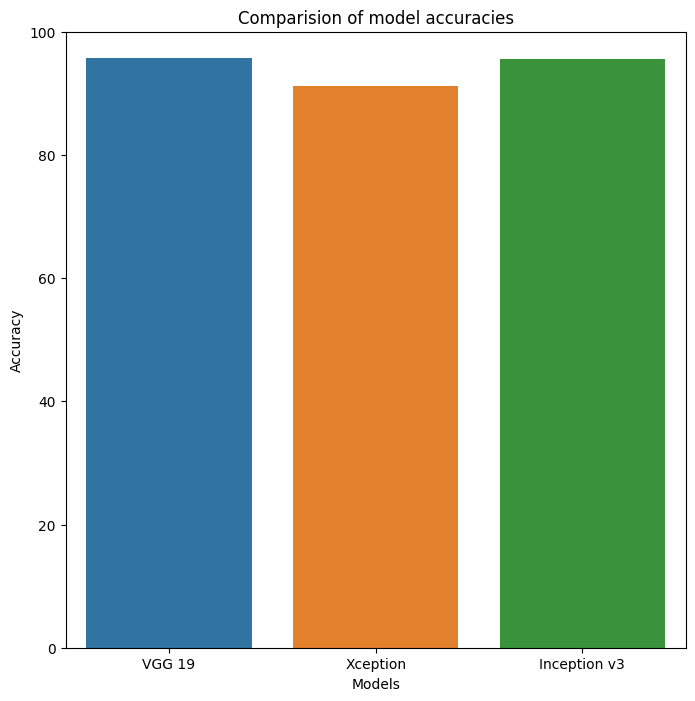

In [32]:
res=pd.DataFrame(data=[[accuracy,accuracy2,accuracy3]],columns=['VGG 19','Xception','Inception v3'])
print(res.head())
fig=plt.figure(figsize=(8,8))
sns.barplot(data=res)
plt.title('Comparision of model accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim([0,100])

# Test with external image

In [38]:
from google.colab import files
files.upload()

{}

(1, 190, 190, 3)

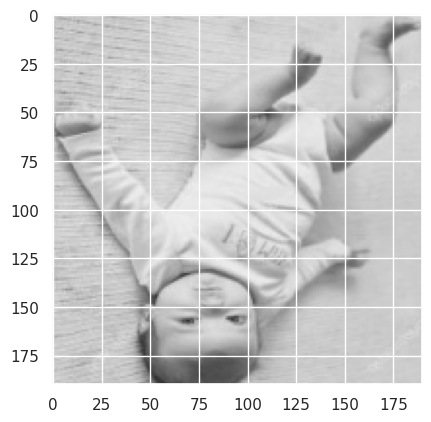

In [43]:
image_name='/content/baby_position/correct_baby_position/85_jpg.rf.8c9eec642872fdfe3178bcafd0de62c6.jpg'   # enter image name to test

x1=[]
img_1 = cv2.imread(image_name, cv2.IMREAD_COLOR)
resized_arr_1 = cv2.resize(img_1, (img_size, img_size)) # Reshaping images to preferred size
plt.imshow(resized_arr_1)
x1.append([resized_arr_1])
x1=np.array(x1)
x1 = preprocess_input(x1)
x1 = x1.reshape(-1, img_size, img_size, 3)
x1.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 945ms/step


<ipython-input-35-3cc5c2d9d5df>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(class_names,rotation=90)


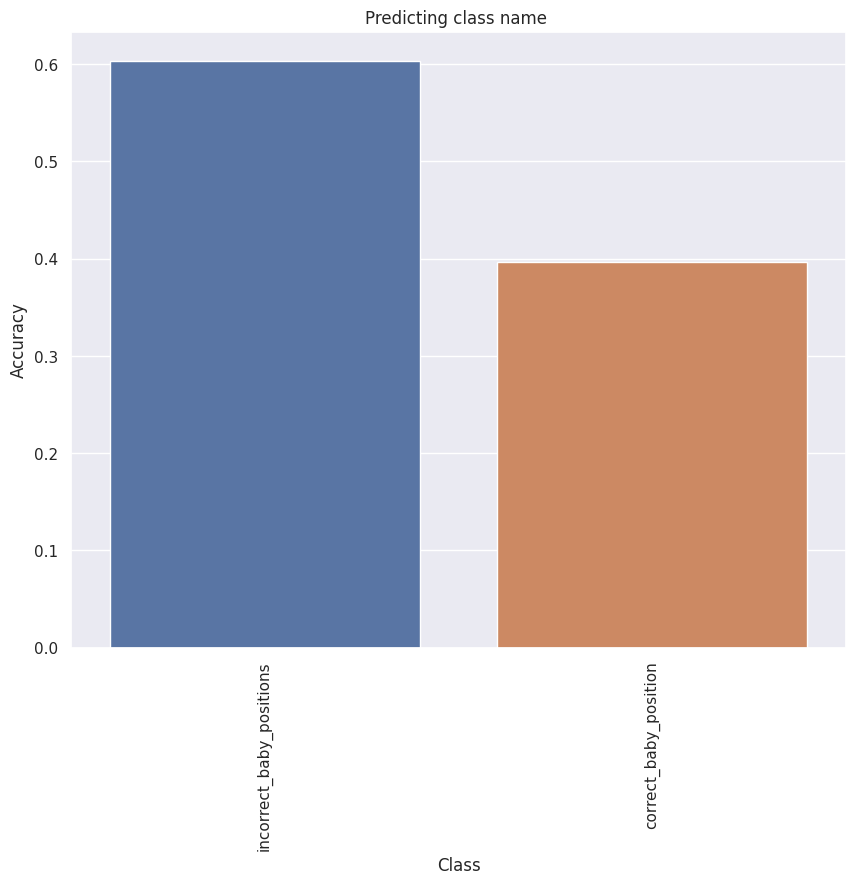

In [35]:
pred=model.predict(x1) # for predicting class
labels_pred=np.argmax(pred,axis=1)
labels=class_names[labels_pred[0]]
pred_results=pd.DataFrame(data=pred,columns=class_names)
fig=plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid")
ax=sns.barplot(data=pred_results)
ax.set_xticklabels(class_names,rotation=90)
ax.set_xlabel('Class')
ax.set_ylabel('Accuracy')
ax.set_title('Predicting class name ')
plt.show()